In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [28]:
# read the csv and index is the first column
data = pd.read_csv('State_wise_coal_price.csv', index_col=0)
coal_price = data['INR/Mcal']
coal_mine = pd.read_csv('India_coal_mine.csv')

In [29]:
State_name = ['Bihar', 'Jharkhand', 'Odisha',
              'Sikkim', 'West Bengal', 'Arunachal Pradesh',
              'Assam', 'Meghalaya', 'Manipur',
              'Mizoram', 'Nagaland', 'Tripura',
              'Delhi', 'Himachal Pradesh', 'Haryana',
              'Jammu and Kashmir', 'Punjab', 'Rajasthan',
              'Uttarakhand', 'Uttar Pradesh', 'Andhra Pradesh',
              'Karnataka', 'Kerala', 'Tamil Nadu',
              'Telangana', 'Chhattisgarh', 'Goa',
              'Gujarat', 'Maharashtra', 'Madhya Pradesh']

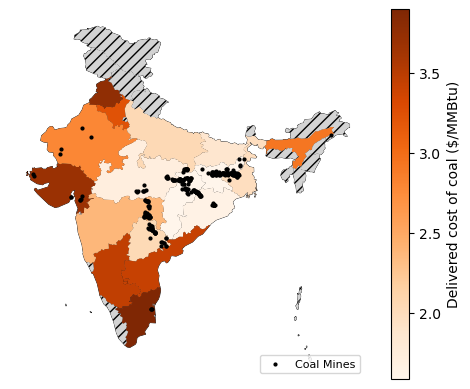

In [33]:
fp = '/Users/yifuding/Desktop/India_project_data/India_shape/india-polygon.shp'
States = gpd.GeoDataFrame.from_file(fp, crs="EPSG:4326")
ax = States.plot(edgecolor='k', color='white', linewidth=0.5)
coal_mine = gpd.GeoDataFrame(coal_mine, geometry=gpd.points_from_xy(coal_mine['Longitude'], coal_mine['Latitude']))

States = States.set_index('st_nm')
StateLoad = States.join(coal_price)

ax1 = StateLoad.plot(column = 'INR/Mcal', cmap='Oranges', ax=ax, legend=True, missing_kwds={"color": "lightgrey", "hatch": "///"},
                     legend_kwds={'label': "Delivered cost of coal ($/MMBtu)"})
ax2 = coal_mine.plot(color='black', markersize=4, label='Coal Mines', ax=ax)
plt.legend(loc='lower right', fontsize=8)
plt.axis('off')
plt.savefig('coal_price.png', bbox_inches='tight')


In [23]:
# read the coal mine data 
coal_mine = pd.read_csv('India_coal_mine.csv')
print(coal_mine)


         c  MSHA ID Country / Area  \
0    M0464      NaN          India   
1    M0465      NaN          India   
2    M0466      NaN          India   
3    M0467      NaN          India   
4    M0468      NaN          India   
..     ...      ...            ...   
362    NaN      NaN            NaN   
363    NaN      NaN            NaN   
364    NaN      NaN            NaN   
365    NaN      NaN            NaN   
366    NaN      NaN            NaN   

                                             Mine Name  \
0                                      Adasa Coal Mine   
1                                   Adriyala Coal Mine   
2                                        AKK Coal Mine   
3                                    Amadand Coal Mine   
4    Amalgamated Keshalpur-West Mudidih (AKWMC) Coa...   
..                                                 ...   
362                                                NaN   
363                                                NaN   
364                  

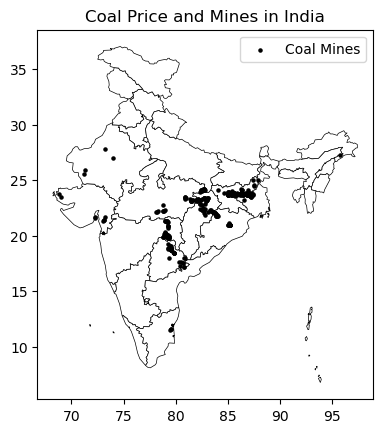

In [27]:
# plot the coal mine data
ax = States.plot(edgecolor='k', color='white', linewidth=0.5)
coal_mine = gpd.GeoDataFrame(coal_mine, geometry=gpd.points_from_xy(coal_mine['Longitude'], coal_mine['Latitude']))
ax1 = coal_mine.plot(color='black', markersize=5, label='Coal Mines', ax=ax)
plt.legend()
plt.title('Coal Price and Mines in India')
plt.savefig('coal_price_and_mines.png', bbox_inches='tight')